# PyFlo NRCS Method Demo

The NRCS or runoff curve number method is a method of predicting runoff flow and volumes using a curve number based on soil type, area of the site, time of concentration, peak factor, and runoff distribution. It is different from the rational method in that it uses curve numbers instead of runoff coefficients, and soils are classified in types A through D.

In [1]:
#import necessary modules
import pyflo
import pandas as pd
import numpy as np
from matplotlib import pyplot

from pyflo import system
from pyflo.nrcs import hydrology

## Generating a Unit Hydrograph using runoff data

A unit hydrographrepresents the time-flow relationship per unit (inch) of runoff depth.

The hydrological inputs are used to classify the "basin", which in this package represents the watershed draining to a node with hydrology attributes, dimensions, and methods.

In [39]:
#read the runoff csv file as a dataframe
df_484 = pd.read_csv('data/runoff.csv')

#convert the runoff dataframe to a numpy array
uh484 = np.array(df_484)

#define the basin using the ncrs method
basin = hydrology.Basin(area=4.6, cn=85.0, tc=2.3, runoff_dist=uh484, peak_factor=484.0)

In [40]:
unit_hydrograph = basin.unit_hydrograph(interval=0.1)

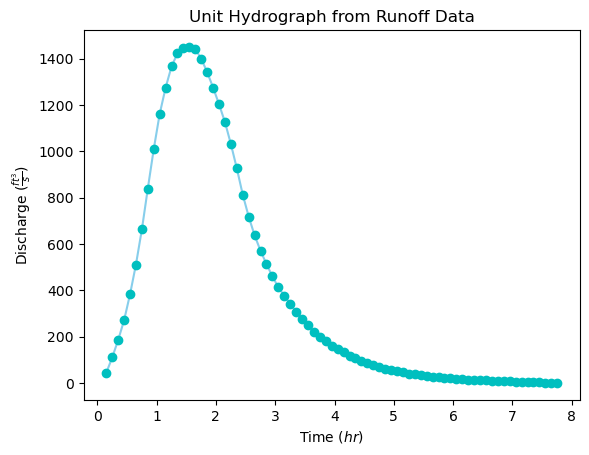

In [18]:
#plot the unit hydrograph
x = unit_hydrograph[:, 0]
y = unit_hydrograph[:, 1]
pyplot.plot(x, y, 'skyblue')
pyplot.plot(x, y, 'co')
pyplot.title(r'Unit Hydrograph from Runoff Data')
pyplot.xlabel(r'Time ($hr$)')
pyplot.ylabel(r'Discharge ($\frac{ft^{3}}{s}$)')
pyplot.show()

## Generating a Flood Hydrograph using runoff data

A flood hydrograph is a time-flow relationship synthesized from basin properties and a provided scaled rainfall distribution.

In [19]:
flood_data = pd.read_csv('data/flood.csv')
rainfall_dist = np.array(flood_data)

#use a scaled distribution of 7 inches over 8 hours
rainfall_depths = rainfall_dist * [8.0, 7.0]  
flood_hydrograph = basin.flood_hydrograph(rainfall_depths, interval=0.1)

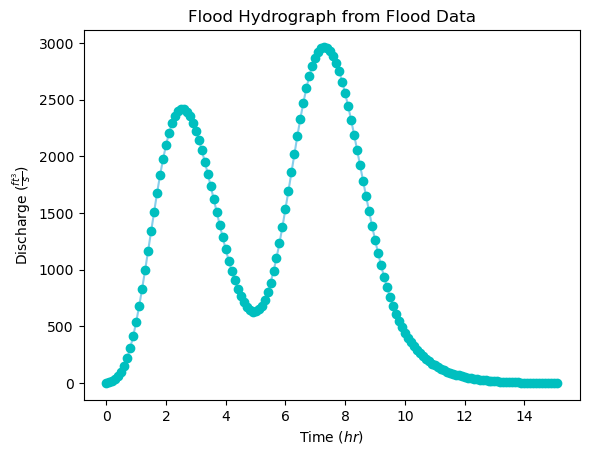

In [20]:
from matplotlib import pyplot

x = flood_hydrograph[:, 0]
y = flood_hydrograph[:, 1]
pyplot.plot(x, y, 'skyblue')
pyplot.plot(x, y, 'co')
pyplot.title(r'Flood Hydrograph from Flood Data')
pyplot.xlabel(r'Time ($hr$)')
pyplot.ylabel(r'Discharge ($\frac{ft^{3}}{s}$)')
pyplot.show()